Flipkart Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Customer_support_data.csv')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [4]:
df.shape

(85907, 20)

In [5]:
df.dtypes

Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [7]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

Use df.dropna() to drop missing values.

Use df.fillna(value) to fill missing values with a specific value (e.g., 0, mean, median).



In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64

In [12]:
# If you want to convert both columns to int, you need to select them as a list and use the correct column names.
# However, both 'Customer_City' and 'Product_category' are of object type and likely contain non-numeric data,
# so converting them to int will raise a ValueError. If you want to encode them as integers, use .astype('category').cat.codes:

df['Customer_City'] = df['Customer_City'].astype('category').cat.codes
df['Product_category'] = df['Product_category'].astype('category').cat.codes

In [13]:
df.head(5)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
13565,08c6a929-a403-4f14-810f-2275fe591230,Outcall,Returns,Return request,Good,0258d703-8287-428d-9e48-446e29eec3e5,29/07/2023 03:44,05/08/2023 11:11,05/08/2023 11:50,05-Aug-23,9,0,899.0,367.0,Katelyn Horton,Mason Gupta,Olivia Tan,0-30,Morning,5
13603,eae37bb3-91ec-4154-ba3c-7e4a6309a946,Outcall,Returns,Return request,Not good,d5d704c1-7d8e-4573-8e9d-aec29e6d3b40,31/07/2023 20:21,04/08/2023 12:04,05/08/2023 07:02,05-Aug-23,27,0,899.0,604.0,Michael Ruiz,Madison Kim,John Smith,>90,Morning,2
18445,296c5c93-6a4f-4fa5-b276-3feecfeaf636,Outcall,Returns,Return request,Call was helpful.,6a318938-1b06-4394-82d7-83a0d7c18f29,29/07/2023 22:52,09/08/2023 12:40,09/08/2023 12:43,09-Aug-23,0,0,868.0,233.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,4
19678,5155d369-7bc3-4c40-9e26-6dcee58ace99,Outcall,Returns,Return request,Good service,feb6c5f8-5418-4abc-aec4-494ce0df2791,01/08/2023 13:35,08/08/2023 12:35,08/08/2023 12:39,08-Aug-23,11,0,899.0,458.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,5
20080,ddaae943-3535-452e-857f-591d4b9ae0c8,Outcall,Cancellation,Return cancellation,Thanks,68b1ae3c-a0f9-48c7-96f0-2e17a460814c,03/08/2023 13:42,07/08/2023 13:55,08/08/2023 09:21,08-Aug-23,5,0,799.0,362.0,Patricia Cross,Mason Gupta,Olivia Tan,0-30,Afternoon,5


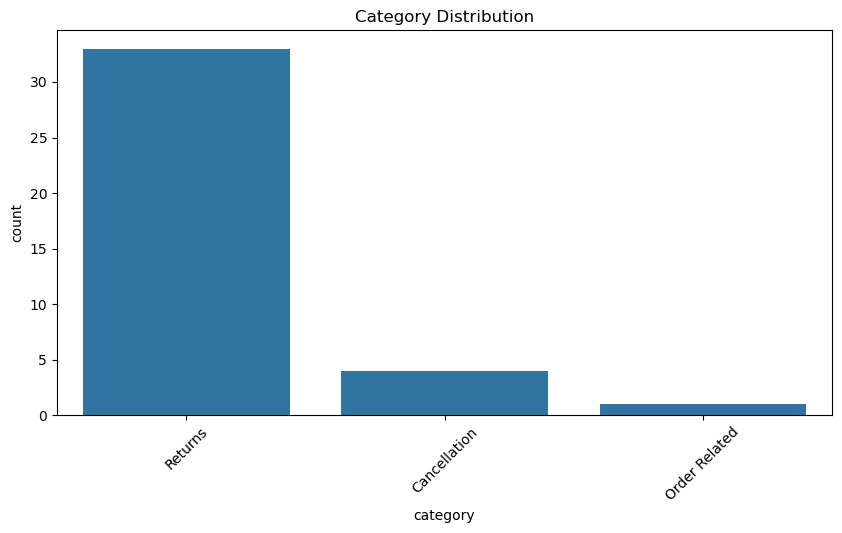

In [14]:
#Creates a new figure with a width of 10 and height of 5 inches.
#order=... ensures the bars are sorted from most frequent to least.
# Rotates the x-axis labels by 45 degrees to prevent overlapping, making long category names easier to read.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()


tarts a format specifier.

1.1f →

1 → minimum width of the output (optional).

.1 → one decimal place.

f → floating-point number.

%% → displays a literal percent sign (%) (since % is a special character in format strings).

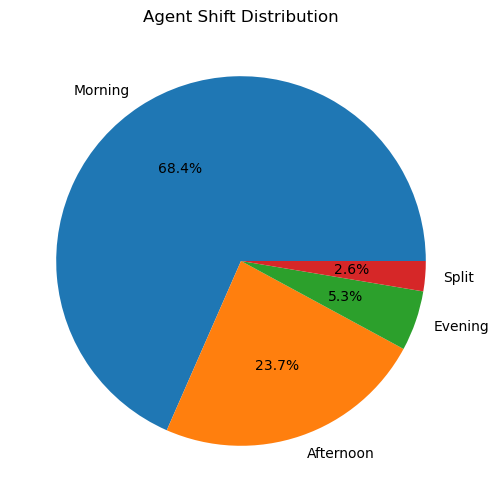

In [15]:
df['Agent Shift'].value_counts().plot.pie(autopct = '%1.1f%%',figsize = (6,6))
plt.title('Agent Shift Distribution')
plt.ylabel('')
plt.show()


In [16]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
13565,08c6a929-a403-4f14-810f-2275fe591230,Outcall,Returns,Return request,Good,0258d703-8287-428d-9e48-446e29eec3e5,29/07/2023 03:44,05/08/2023 11:11,05/08/2023 11:50,05-Aug-23,9,0,899.0,367.0,Katelyn Horton,Mason Gupta,Olivia Tan,0-30,Morning,5
13603,eae37bb3-91ec-4154-ba3c-7e4a6309a946,Outcall,Returns,Return request,Not good,d5d704c1-7d8e-4573-8e9d-aec29e6d3b40,31/07/2023 20:21,04/08/2023 12:04,05/08/2023 07:02,05-Aug-23,27,0,899.0,604.0,Michael Ruiz,Madison Kim,John Smith,>90,Morning,2
18445,296c5c93-6a4f-4fa5-b276-3feecfeaf636,Outcall,Returns,Return request,Call was helpful.,6a318938-1b06-4394-82d7-83a0d7c18f29,29/07/2023 22:52,09/08/2023 12:40,09/08/2023 12:43,09-Aug-23,0,0,868.0,233.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,4
19678,5155d369-7bc3-4c40-9e26-6dcee58ace99,Outcall,Returns,Return request,Good service,feb6c5f8-5418-4abc-aec4-494ce0df2791,01/08/2023 13:35,08/08/2023 12:35,08/08/2023 12:39,08-Aug-23,11,0,899.0,458.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,5
20080,ddaae943-3535-452e-857f-591d4b9ae0c8,Outcall,Cancellation,Return cancellation,Thanks,68b1ae3c-a0f9-48c7-96f0-2e17a460814c,03/08/2023 13:42,07/08/2023 13:55,08/08/2023 09:21,08-Aug-23,5,0,799.0,362.0,Patricia Cross,Mason Gupta,Olivia Tan,0-30,Afternoon,5


The error occurs because you are trying to use .sum() on the 'Agent_name' column, which is of object (string) type, and then plotting it. Summing strings does not make sense for plotting numeric data.

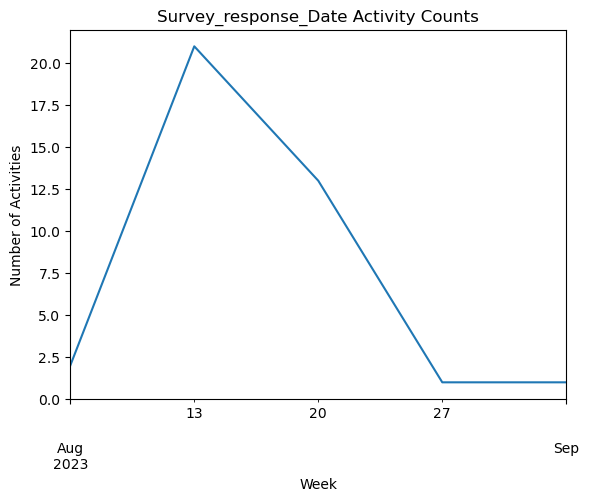

In [30]:
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'])
df.set_index('Survey_response_Date').resample('W')['Agent_name'].count().plot()
plt.title('Survey_response_Date Activity Counts')
plt.xlabel('Week')
plt.ylabel('Number of Activities')
plt.show()

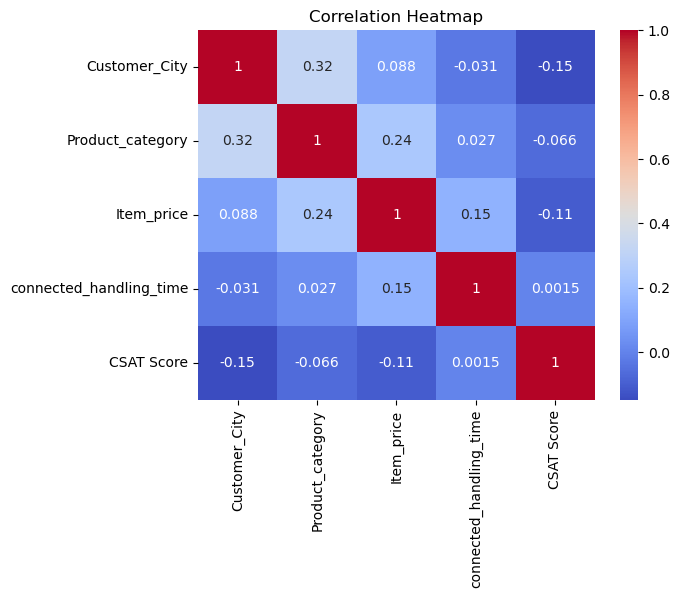

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

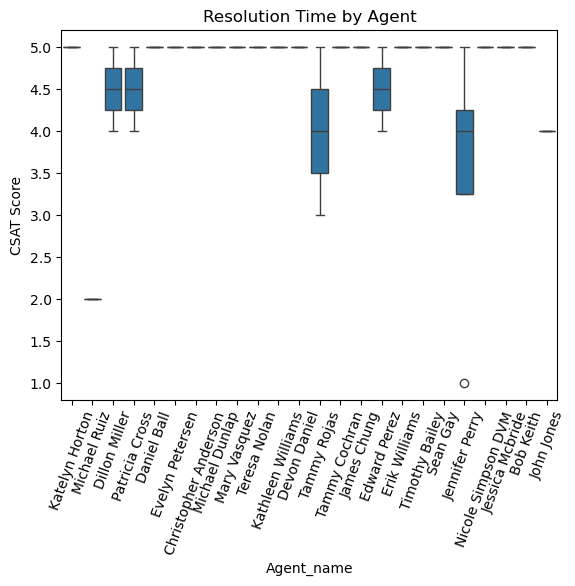

In [28]:
sns.boxplot(data=df, x='Agent_name', y='CSAT Score')
plt.xticks(rotation = 70)
plt.title('Resolution Time by Agent')
plt.show()

In [ ]:
df_grouped = df.groupby(['Agent_name', 'CSAT '])